In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [29]:
model_architecture = "protoeyetcn"
checkpoint_dir = f"../results/Benfatto/6s_segments/{architecture}/cross_validation/"
eval_time = "full_training"

In [30]:
if eval_time == "full_training":
    idx = -1
else:
    idx = -2

In [31]:
train_accs = []
valid_accs = []
conf_matrix = []
acc, brier, auc, balanced_acc = [], [], [], []
f1, precision, recall = [], [], []
for i in range(10):
    if "proto" in model_architecture:
        with open(checkpoint_dir + "fold_" + str(i+1) + '/stages_2_3_4' + '/checkpoint_logs.json') as f:
            logs = json.load(f)
    else:
        with open(checkpoint_dir + "fold_" + str(i+1) + '/checkpoint_logs.json') as f:
            logs = json.load(f)
    if logs['balanced_acc'][idx] is not None:
        train_accs.append(logs['epoch_train_acc'][idx]) 
        valid_accs.append(logs['epoch_valid_acc'][idx])  
        conf_matrix.append(logs['confusion_matrix'][idx])
        acc.append(logs['acc'][idx])
        brier.append(logs['brier'][idx])
        auc.append(logs['auc'][idx])
        balanced_acc.append(logs['balanced_acc'][idx])
        f1.append(logs['f1'][idx])
        precision.append(logs['precision'][idx])
        recall.append(logs['recall'][idx])

In [32]:
text_file = open(checkpoint_dir + eval_time + "_Result.txt", "w")
text_file.write(f"Mean validation accuracy: {np.mean(valid_accs)}\n")
text_file.write(f"Mean balanced validation accuracy: {np.mean(balanced_acc)}\n")
text_file.write(f"Standard deviation of the balanced validation accuracy: {np.std(balanced_acc)}\n")
text_file.write(f"Mean validation AUC: {np.mean(auc)}\n")
text_file.write(f"Mean validation precision: {np.mean(precision)}\n")
text_file.write(f"Mean validation recall: {np.mean(recall)}\n")
text_file.write(f"Mean validation F1 score: {np.mean(f1)}\n")
text_file.write(f"Mean validation confusion matrix:\n{np.mean(conf_matrix, axis=0)}\n")
text_file.write("\n")
text_file.close()


In [33]:
print(f"Mean validation accuracy: {np.mean(valid_accs)}")
print(f"Mean balanced validation accuracy: {np.mean(balanced_acc)}")
print(f"Standard deviation of the balanced validation accuracy: {np.std(balanced_acc)}")
print(f"Mean validation AUC: {np.mean(auc)}")
print(f"Mean validation precision: {np.mean(precision)}")
print(f"Mean validation recall: {np.mean(recall)}")
print(f"Mean validation F1 score: {np.mean(f1)}")
print("Mean validation confusion matrix:")
print(np.mean(conf_matrix, axis=0))

Mean validation accuracy: 0.9117710720651896
Mean balanced validation accuracy: 0.8613041634174102
Standard deviation of the balanced validation accuracy: 0.05920586893349975
Mean validation AUC: 0.949598410386093
Mean validation precision: 0.8870232741506664
Mean validation recall: 0.9881972944216446
Mean validation F1 score: 0.9330509214208259
Mean validation confusion matrix:
[[17.2  6.7]
 [ 0.6 53.3]]


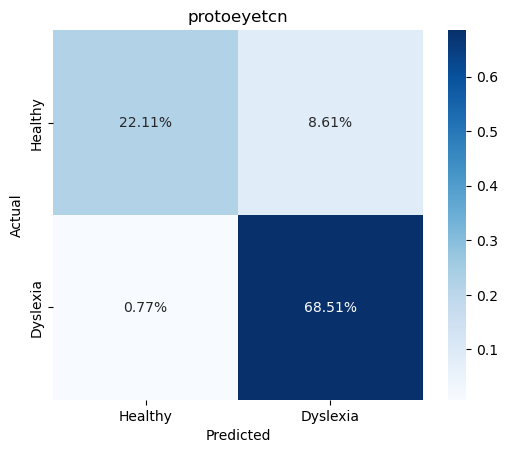

In [34]:
name = model_architecture
# confusion_matrix = [[tn, fp], [fn, tp]]
confusion_matrix = np.mean(conf_matrix, axis=0)
ax = sns.heatmap(confusion_matrix/np.sum(confusion_matrix), xticklabels=['Healthy', 'Dyslexia'], yticklabels=['Healthy', 'Dyslexia'], annot=True, fmt='.2%', square=True, cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title(name)
plt.savefig(checkpoint_dir + eval_time + f'_{name}_conf_matrix.png', dpi=600)